In [382]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image
import cv2
import json
import sys
sys.path.append('../src')

%load_ext autoreload
%autoreload 2


import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'
import easyocr
import keras_ocr



from extract_data.scatterplots import clean_data_series, get_lines, get_axes, predict_points, rescale_points, compare_pred_actual

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
img_df = pd.read_csv('../data/processed/subset_data.csv')
img_df.head()

chart_type     source                                        data_series  \
0       line  generated  [{'x': '0', 'y': 25.132480533926586}, {'x': '1...   
1       line  generated  [{'x': '1990', 'y': 1594.7404572662153}, {'x':...   
2       line  generated  [{'x': 'Jan', 'y': 19.252781561026715}, {'x': ...   
3       line  generated  [{'x': 'Jan', 'y': 13.177213920369073}, {'x': ...   
4       line  generated  [{'x': 'Fiji', 'y': 31.651786659948677}, {'x':...   

                                        path          name  
0  ../data/raw/train/images/6274f182ba84.jpg  6274f182ba84  
1  ../data/raw/train/images/ebed9672f05e.jpg  ebed9672f05e  
2  ../data/raw/train/images/1df6f427d037.jpg  1df6f427d037  
3  ../data/raw/train/images/6b7f05a54ba9.jpg  6b7f05a54ba9  
4  ../data/raw/train/images/0e22a3b55726.jpg  0e22a3b55726

# 1. Scatterplot Sample

In [3]:
# Sample scatterplot
scatter = img_df.query('chart_type == "scatter"').sample(random_state=1)['path'].values[0]

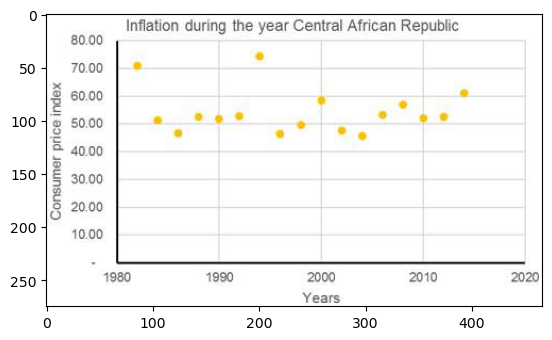

In [4]:
# scatterplot sample
plt.imshow(plt.imread(scatter))
plt.show()

# 2. Extracting Axes

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


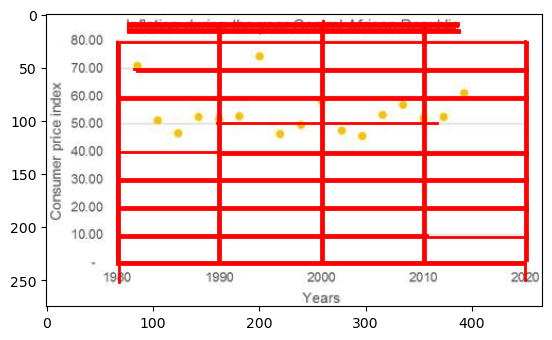

In [5]:
liens = get_lines(scatter)

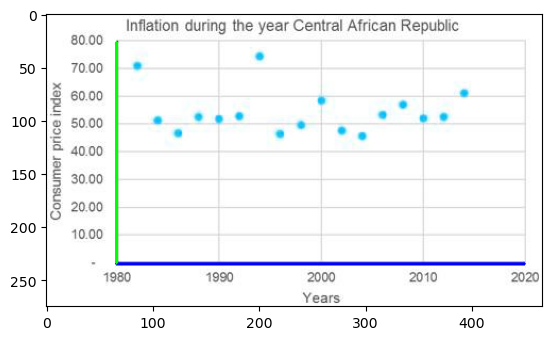

In [6]:
x_axis, y_axis = get_axes(scatter, show_plot=True)



# 3. Extracting Scatterplot Points

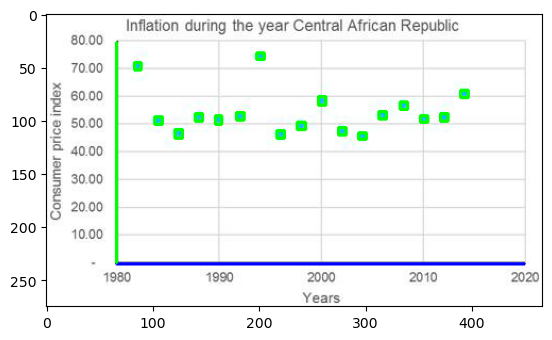

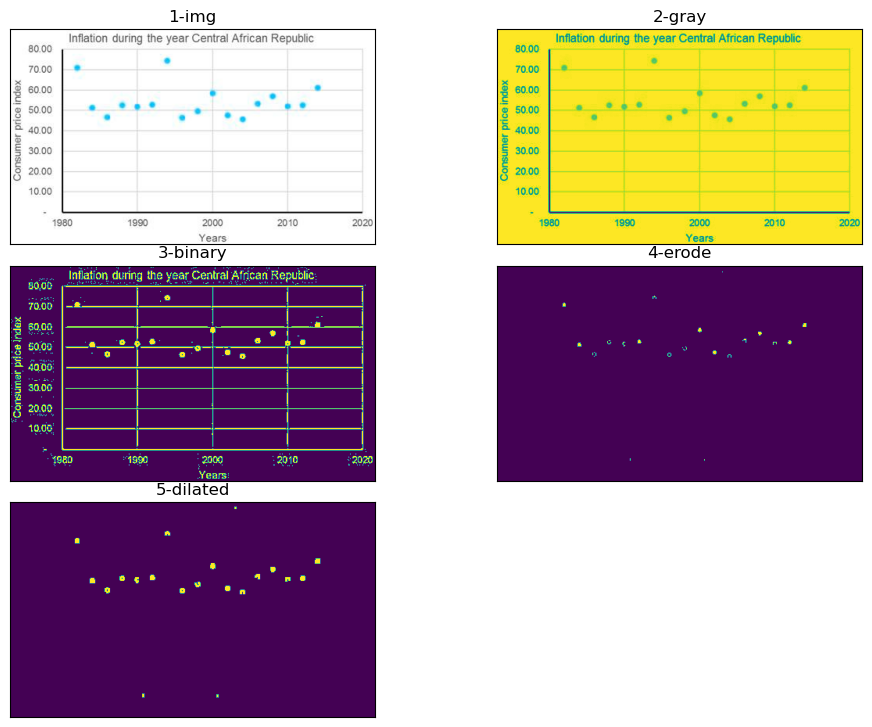

In [7]:
from extract_data.scatterplots import get_points

points = get_points(scatter, x_axis, y_axis, show_plot=True, show_transformations=True)

# 4. Rescaling the points to match the scale of the scatterplot axes

In [8]:
scaled_points = rescale_points(points, x_axis, y_axis, 1980, 2020, 0, 80)
scaled_points

[(2003, 47, 2004, 44),
 (1995, 47, 1996, 45),
 (1985, 48, 1986, 45),
 (2001, 49, 2002, 46),
 (1997, 51, 1998, 48),
 (1983, 52, 1984, 50),
 (2009, 53, 2010, 51),
 (1989, 53, 1990, 50),
 (2011, 54, 2012, 51),
 (1987, 54, 1988, 51),
 (1991, 54, 1992, 51),
 (2005, 54, 2006, 52),
 (2007, 58, 2008, 55),
 (1999, 60, 2000, 57),
 (2013, 62, 2014, 59),
 (1981, 72, 1982, 69),
 (1993, 76, 1994, 73)]

# 5. Comparing Predicted Coordinates to Actual Coordinates

In [9]:
scatter_index = img_df.query('chart_type == "scatter"').sample(random_state=1).index[0]

actual = clean_data_series(scatter_index)
pred = predict_points(scaled_points)
pred_actual = compare_pred_actual(pred,actual)
pred_actual

x_pred  y_pred     x_actual   y_actual
0   1981.5    70.5  1981.995842  70.783939
1   1983.5    51.0  1983.970894  51.153601
2   1985.5    46.5  1985.980596  46.692161
3   1987.5    52.5  1987.955648  52.683238
4   1989.5    51.5  1989.965350  51.790950
5   1991.5    52.5  1991.940402  52.810707
6   1993.5    74.5  1993.915454  74.225621
7   1995.5    46.0  1995.925156  46.309751
8   1997.5    49.5  1998.004158  49.496495
9   1999.5    58.5  1999.979210  58.546845
10  2001.5    47.5  2002.092862  47.711918
11  2003.5    45.5  2003.998614  45.799873
12  2005.5    53.0  2005.939016  53.193117
13  2007.5    56.5  2008.018018  56.889739
14  2009.5    52.0  2009.958420  52.045889
15  2011.5    52.5  2012.072072  52.428298
16  2013.5    60.5  2013.929314  61.108987

# 6. Trying other Scatterplot Samples

In [10]:
scatter_samples = img_df.query('chart_type == "scatter"').head(10)
scatter_samples

chart_type     source  \
14570    scatter  generated   
14571    scatter  generated   
14572    scatter  generated   
14573    scatter  generated   
14574    scatter  generated   
14575    scatter  generated   
14576    scatter  generated   
14577    scatter  generated   
14578    scatter  generated   
14579    scatter  generated   

                                             data_series  \
14570  [{'x': 0.9773619580653242, 'y': 78.79986811737...   
14571  [{'x': 1.0341113105924589, 'y': 6.528035647976...   
14572  [{'x': 1990.0441583549366, 'y': 344.8726439123...   
14573  [{'x': 1974.8483623129803, 'y': 17552.88388373...   
14574  [{'x': 1.046979865771812, 'y': 98.658703897990...   
14575  [{'x': 1949.8385093167701, 'y': 93.48479127333...   
14576  [{'x': 1990.0, 'y': 165.6921862667719}, {'x': ...   
14577  [{'x': 1995.0604737107342, 'y': 27.94599807135...   
14578  [{'x': 1949.9506416584402, 'y': 99.33593597501...   
14579  [{'x': 1950.250569476082, 'y': 49.305135951661...   

                                            path          name  
14570  ../data/raw/train/images/1738e31c7f3f.jpg  1738e31c7f3f  
14571  ../data/raw/train/images/0f04deb1d36c.jpg  0f04deb1d36c  
14572  ../data/raw/train/images/7609f2a59041.jpg  7609f2a59041  
14573  ../data/raw/train/images/85538063e5a7.jpg  85538063e5a7  
14574  ../data/raw/train/images/4f4603a737bb.jpg  4f4603a737bb  
14575  ../data/raw/train/images/1b8ada3a4583.jpg  1b8ada3a4583  
14576  ../data/raw/train/images/9e778d350405.jpg  9e778d350405  
14577  ../data/raw/train/images/9ec58b751875.jpg  9ec58b751875  
14578  ../data/raw/train/images/f4cba936717a.jpg  f4cba936717a  
14579  ../data/raw/train/images/0745dfeb49e4.jpg  0745dfeb49e4

## Sample 1

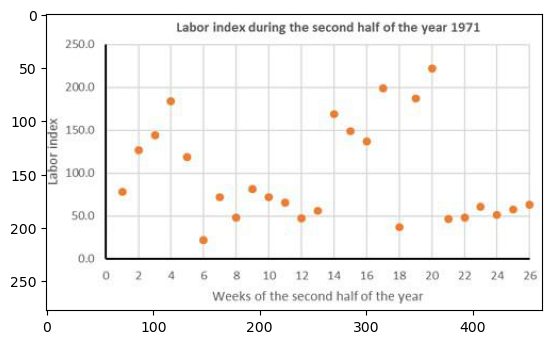

In [11]:
scatter1 = scatter_samples['path'].values[0]
index1 = scatter_samples['data_series'].index[0]

plt.imshow(plt.imread(scatter1))
plt.show()

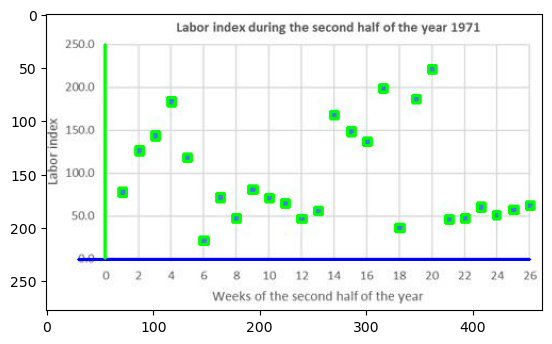

In [12]:
x_axis, y_axis = get_axes(scatter1, show_plot=False)
points = get_points(scatter1, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 0, 26, 0, 250)
pred = predict_points(scaled_points)
actual = clean_data_series(index1)
pred_actual = compare_pred_actual(pred, actual)

## Sample 2

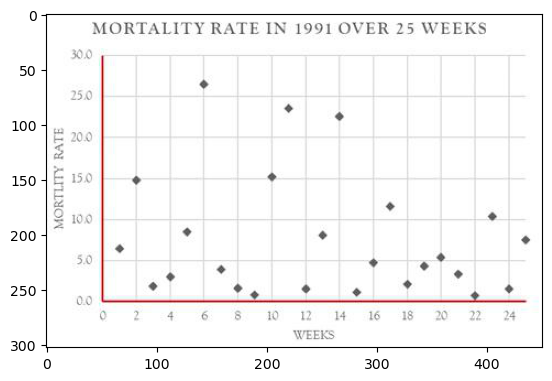

In [13]:
scatter2 = scatter_samples['path'].values[1]
index2 = scatter_samples['data_series'].index[1]

plt.imshow(plt.imread(scatter2))
plt.show()

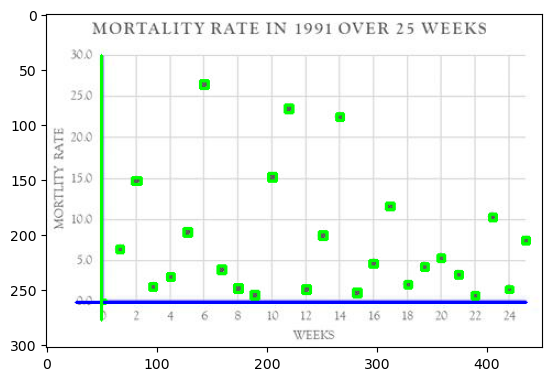

In [14]:
x_axis, y_axis = get_axes(scatter2, show_plot=True)
points = get_points(scatter2, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 0, 26, 0, 30)
pred = predict_points(scaled_points)
actual = clean_data_series(index2)
pred_actual = compare_pred_actual(pred, actual)

## Sample 3

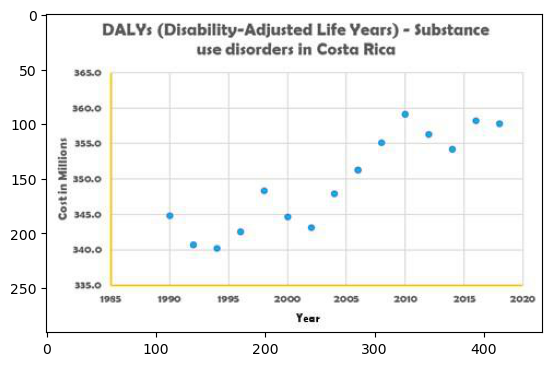

In [15]:
scatter3 = scatter_samples['path'].values[2]
index3 = scatter_samples['data_series'].index[2]

plt.imshow(plt.imread(scatter3))
plt.show()

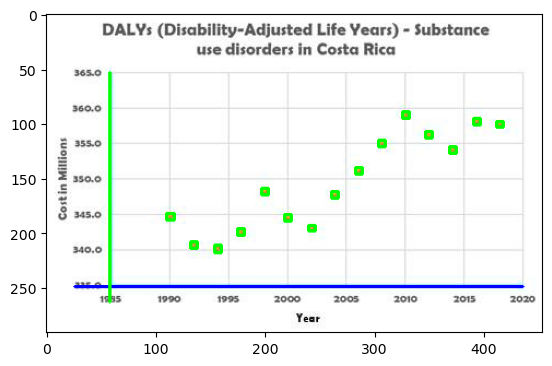

In [16]:
x_axis, y_axis = get_axes(scatter3, show_plot=True)
points = get_points(scatter3, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1985, 2020, 335, 365)
pred = predict_points(scaled_points)
actual = clean_data_series(index3)
pred_actual = compare_pred_actual(pred, actual)

## Sample 4

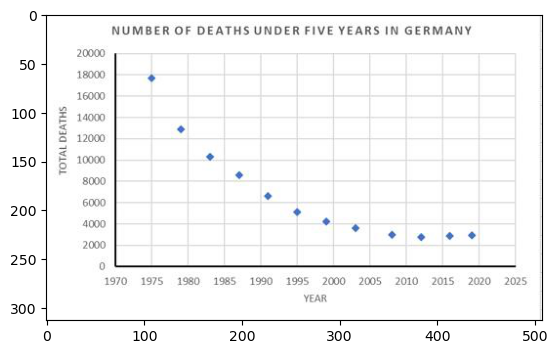

In [17]:
scatter4 = scatter_samples['path'].values[3]
index4 = scatter_samples['data_series'].index[3]

plt.imshow(plt.imread(scatter4))
plt.show()

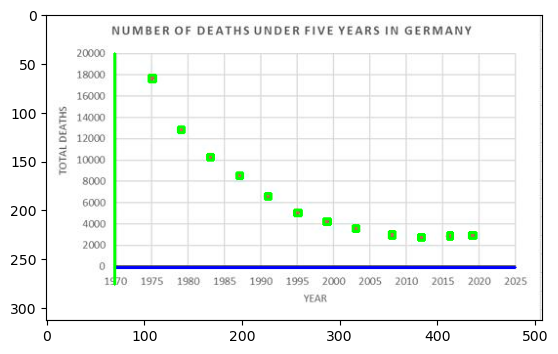

In [18]:
x_axis, y_axis = get_axes(scatter4, show_plot=True)
points = get_points(scatter4, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1970, 2025, 0, 200000)
pred = predict_points(scaled_points)
actual = clean_data_series(index4)
pred_actual = compare_pred_actual(pred, actual)

# Sample 5

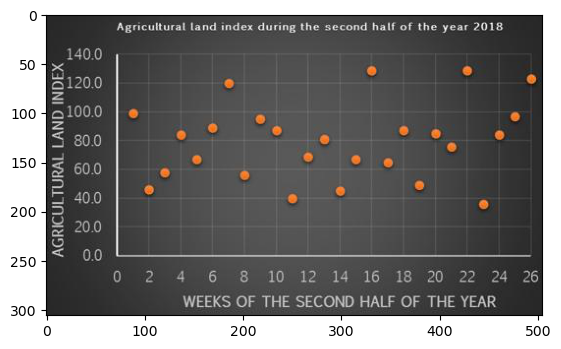

In [19]:
scatter5 = scatter_samples['path'].values[4]
index5 = scatter_samples['data_series'].index[4]

plt.imshow(plt.imread(scatter5))
plt.show()

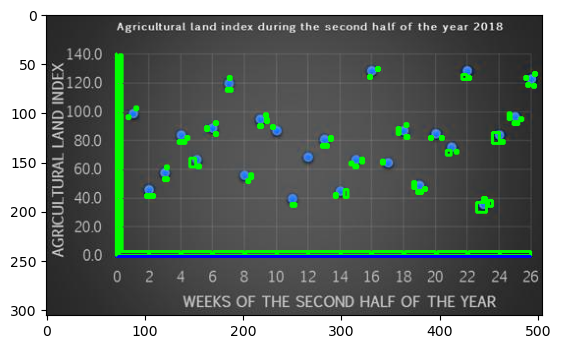

In [20]:
x_axis, y_axis = get_axes(scatter5, show_plot=True)
points = get_points(scatter5, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 0, 26, 0, 140)
pred = predict_points(scaled_points)
actual = clean_data_series(index5)
pred_actual = compare_pred_actual(pred, actual)

## Sample 6

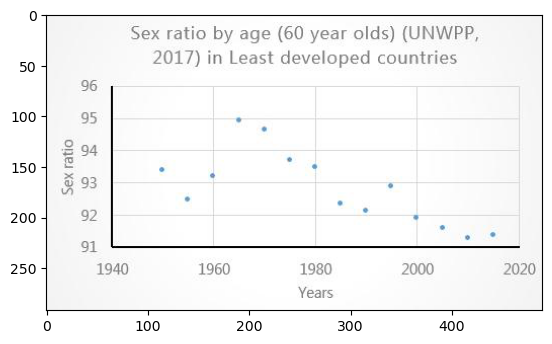

In [21]:
scatter6 = scatter_samples['path'].values[5]
index6 = scatter_samples['data_series'].index[5]

plt.imshow(plt.imread(scatter6))
plt.show()

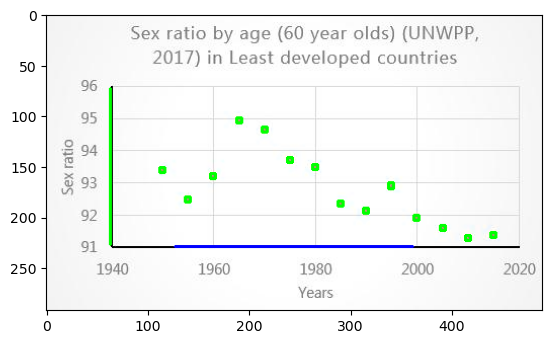

In [22]:
x_axis, y_axis = get_axes(scatter6, show_plot=True)
points = get_points(scatter6, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1940, 2020, 91, 96)
pred = predict_points(scaled_points)
actual = clean_data_series(index6)
pred_actual = compare_pred_actual(pred, actual)

## Sample 7

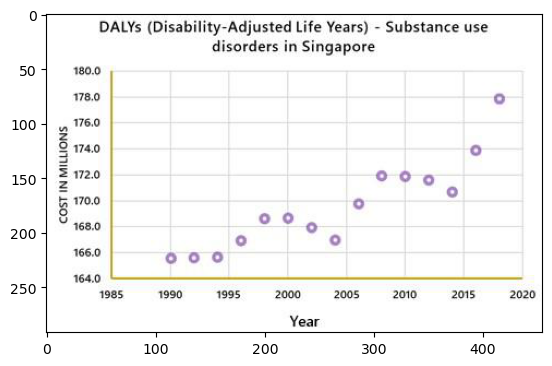

In [23]:
scatter7 = scatter_samples['path'].values[6]
index7 = scatter_samples['data_series'].index[6]

plt.imshow(plt.imread(scatter7))
plt.show()

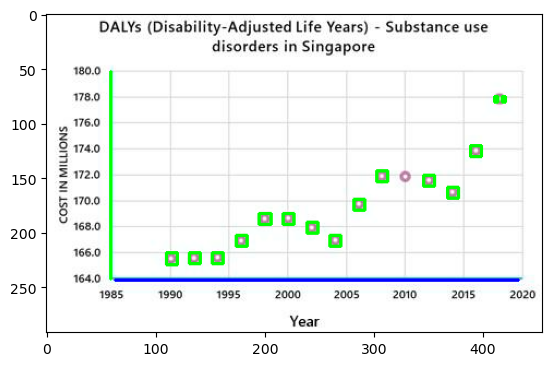

In [24]:
x_axis, y_axis = get_axes(scatter7, show_plot=True)
points = get_points(scatter7, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1985, 2020, 164, 180)
pred = predict_points(scaled_points)
actual = clean_data_series(index7)
pred_actual = compare_pred_actual(pred, actual)

## Sample 8

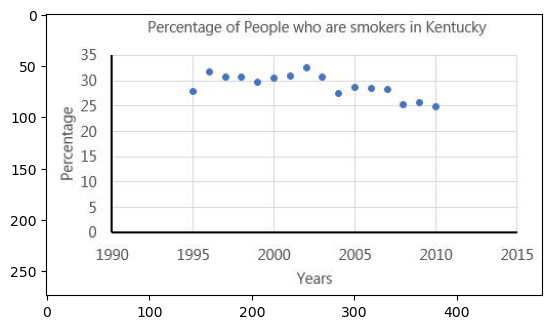

In [25]:
scatter8 = scatter_samples['path'].values[7]
index8 = scatter_samples['data_series'].index[7]

plt.imshow(plt.imread(scatter8))
plt.show()

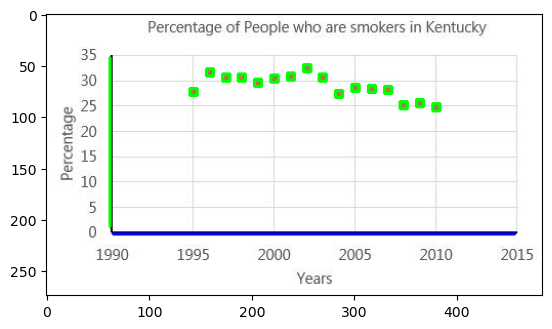

In [26]:
x_axis, y_axis = get_axes(scatter8, show_plot=True)
points = get_points(scatter8, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1990, 2015, 0, 35)
pred = predict_points(scaled_points)
actual = clean_data_series(index8)
pred_actual = compare_pred_actual(pred, actual)

## Sample 9

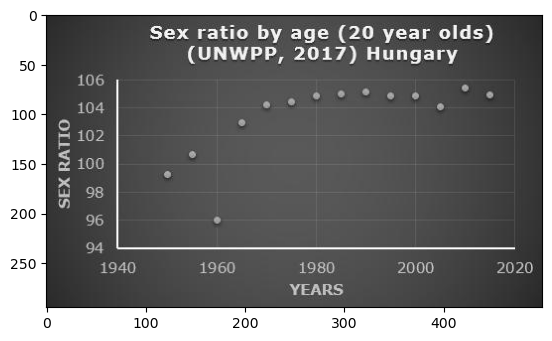

In [27]:
scatter9 = scatter_samples['path'].values[8]
index9 = scatter_samples['data_series'].index[8]

plt.imshow(plt.imread(scatter9))
plt.show()

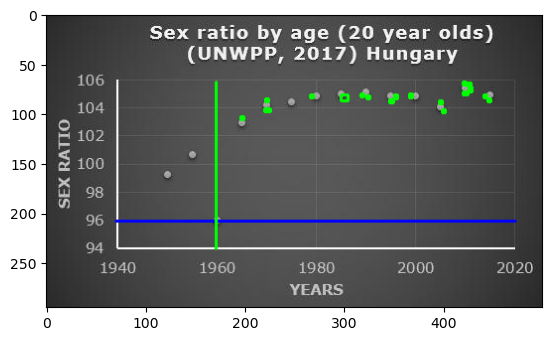

In [28]:
x_axis, y_axis = get_axes(scatter9, show_plot=True)
points = get_points(scatter9, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1940, 2020, 94, 106)
pred = predict_points(scaled_points)
actual = clean_data_series(index9)
pred_actual = compare_pred_actual(pred, actual)

## Sample 10

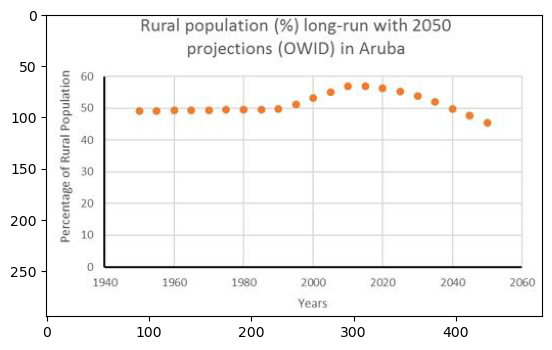

In [29]:
scatter10 = scatter_samples['path'].values[9]
index10 = scatter_samples['data_series'].index[9]

plt.imshow(plt.imread(scatter10))
plt.show()

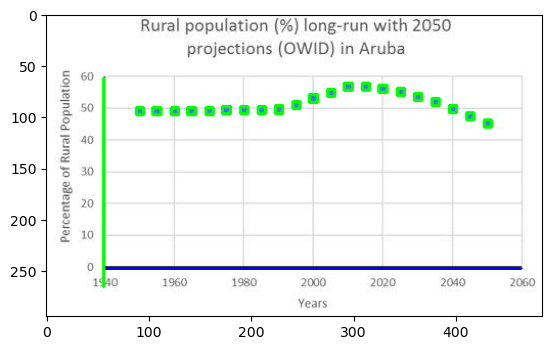

In [30]:
x_axis, y_axis = get_axes(scatter10, show_plot=True)
points = get_points(scatter10, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1940, 2060, 0, 60)
pred = predict_points(scaled_points)
actual = clean_data_series(index10)
pred_actual = compare_pred_actual(pred, actual)

# 7. Issues with Dark Background Images

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


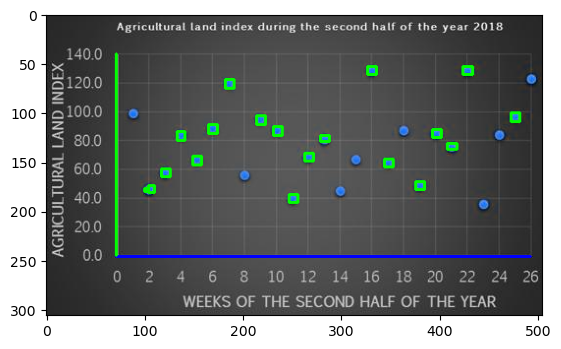

In [89]:
x_axis, y_axis = get_axes(scatter5, show_plot=True)
points = get_points(scatter5, x_axis, y_axis)

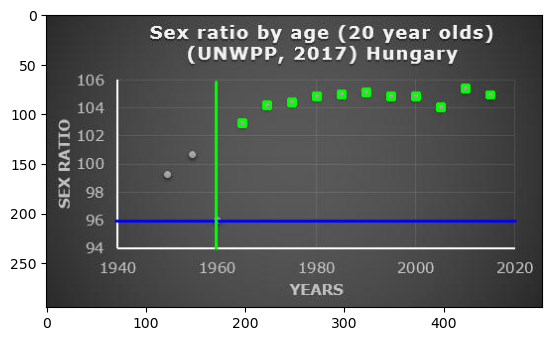

In [90]:
x_axis, y_axis = get_axes(scatter9, show_plot=True)
points = get_points(scatter9, x_axis, y_axis)

# 8. Testing on Many samples at once:

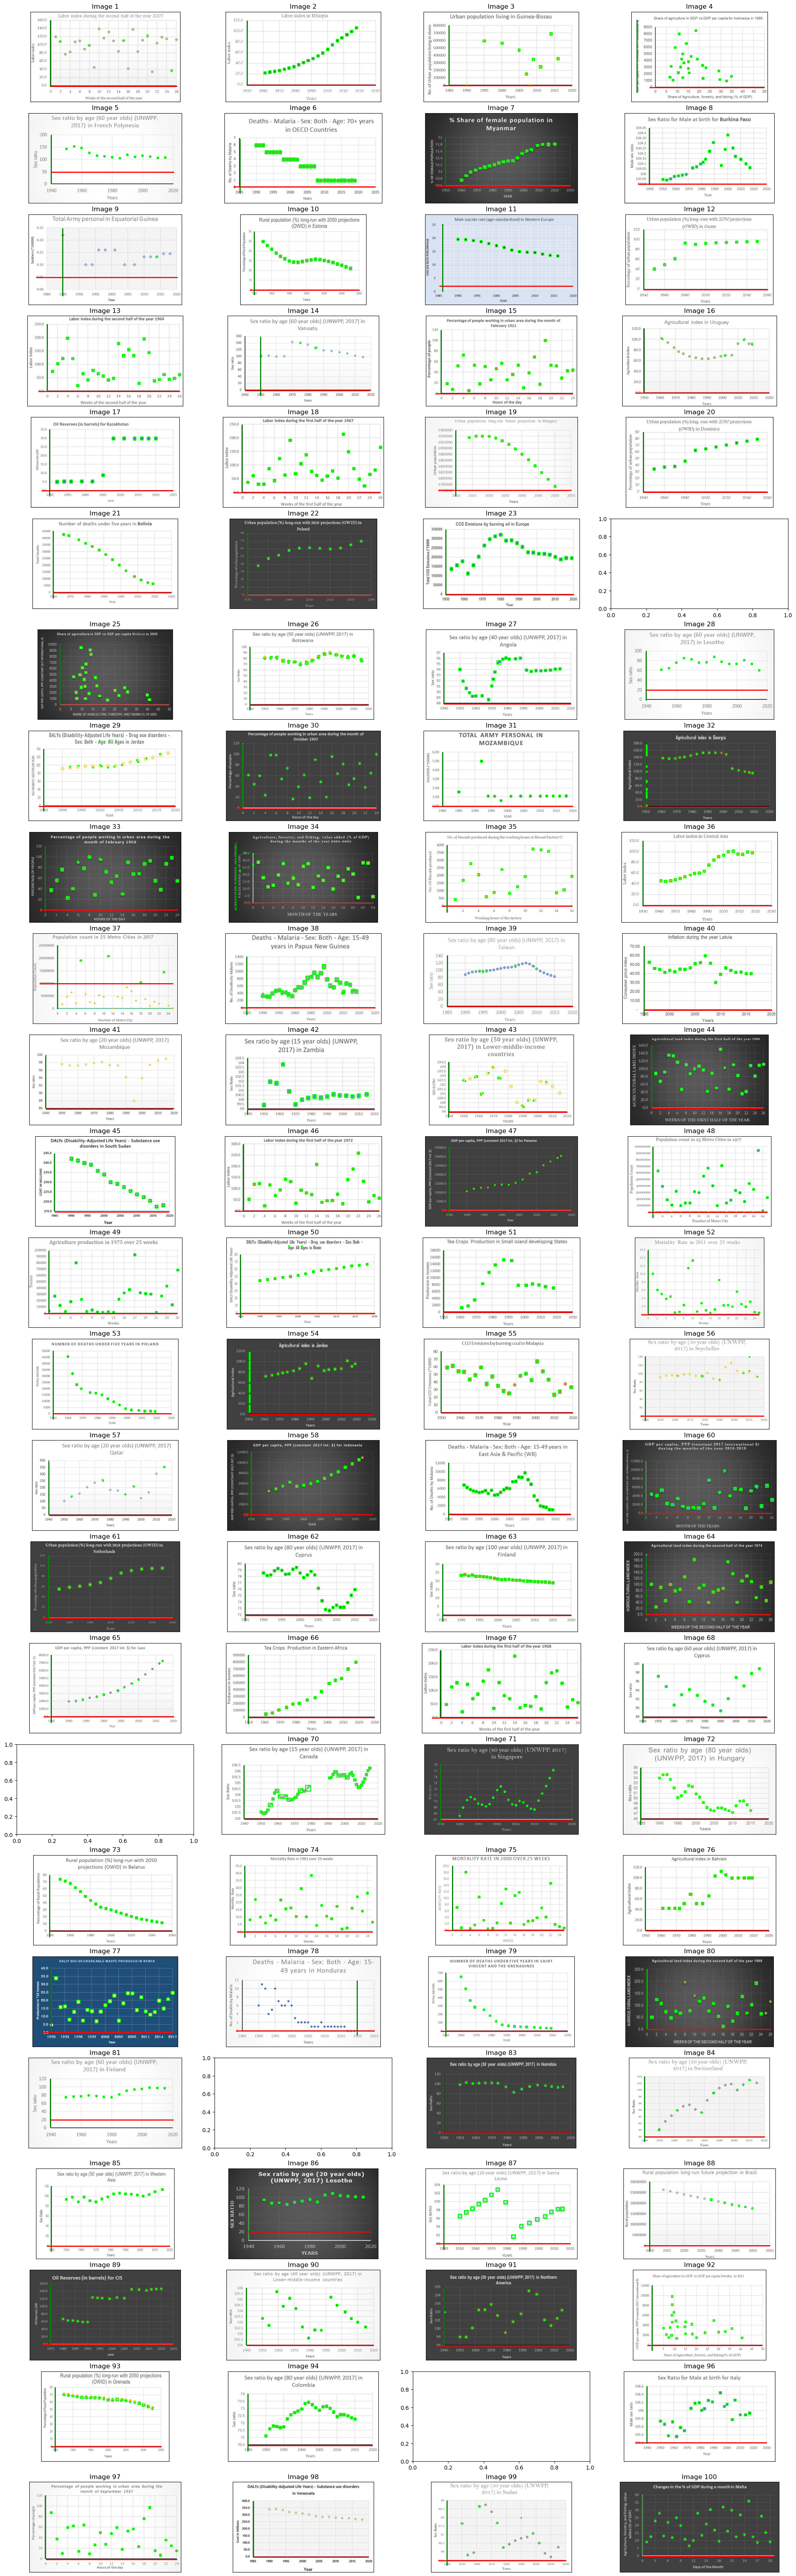

In [327]:

samples_df = img_df.query('chart_type == "scatter"').sample(100, random_state=42)[['path','data_series']]
samples = samples_df['path'].values
indices = list(samples_df.index)

# Number of images per row and column
num_per_row = 4
num_rows = 25

# Calculate the total number of images to display
total_images = num_per_row * num_rows

# Create a new figure with the desired number of subplots
fig, axs = plt.subplots(num_rows, num_per_row, figsize=(20, 65), constrained_layout=True)

# Loop through the sample image paths and display the plots
for i, image_path in enumerate(samples[:total_images]):
    
    try:
        # Call your function to detect axes and points
        num_points = len(clean_data_series(indices[i]))
        x_axis, y_axis = get_axes(image_path, show_plot=False)
        bounding_boxes = get_points(image_path, x_axis, y_axis, num_points=num_points, show_plot=False, show_transformations=False)

        # Load the scatterplot image
        scatter_image = cv2.imread(image_path)

        # Display the image and the detected axes and points in the subplot
        ax = axs[math.floor(i / num_per_row), i % num_per_row]
        ax.imshow(scatter_image)

        # Draw the x-axis and y-axis on the scatterplot image
        x1, y1, x2, y2 = x_axis[0]
        ax.plot([x1, x2], [y1, y2], color='red', linewidth=2)

        x1, y1, x2, y2 = y_axis[0]
        ax.plot([x1, x2], [y1, y2], color='green', linewidth=2)

        # Draw bounding boxes around the detected points
        for bbox in bounding_boxes:
            x1, y1, x2, y2 = bbox
            cv2.rectangle(scatter_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            
        ax.imshow(cv2.cvtColor(scatter_image, cv2.COLOR_BGR2RGB))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Image {i+1}')
    except:
        pass
    
# Adjust the spacing between subplots


# Show the figure with all the subplots
plt.show()


# 9. Creating a Scatterplot with Predicted Values

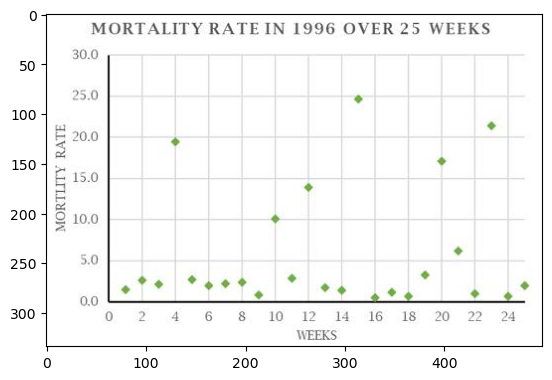

In [371]:
test = img_df.query('chart_type == "scatter"').sample(1)[['path','data_series']]
test_img = test['path'].values[0]
test_index = list(test.index)[0]
plt.imshow(plt.imread(test_img))
plt.show()


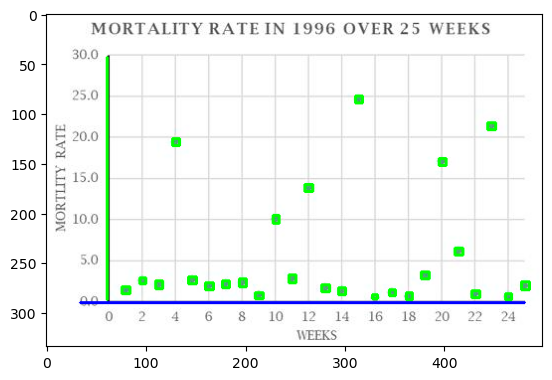

In [372]:
actual = clean_data_series(test_index)
x_axis, y_axis = get_axes(test_img, show_plot=True)
points = get_points(test_img, x_axis, y_axis, num_points = len(actual))
scaled_points = rescale_points(points, x_axis, y_axis, 0, 24, 0, 30)
pred = predict_points(scaled_points)
pred_actual = compare_pred_actual(pred, actual)

In [381]:
x_diffs = np.mean(abs(pred_actual['x_pred'] - pred_actual['x_actual']))
y_diffs = np.mean(abs(pred_actual['y_pred'] - pred_actual['y_actual']))

if x_diffs < 1 and y_diffs < 1:
    print('Accurate Predictions!')
else:
    print('Predictions are not very accurate :(')

Accurate Predictions!


In [375]:
fig = px.scatter(pred, x="x_pred", y="y_pred", width=800, height=500)
fig.update_layout(xaxis= dict(tick0=0, dtick=2, tickmode='linear',title='WEEKS'),
                  yaxis= dict(tick0=0, dtick=5, tickmode='linear',title='MORTALITY RATE'),
                  title = "MORTALITY RATE IN 1996 OVER 25 WEEK")
fig.show()

# Next Steps:

Address the Following Issues:
1. Some axes are in the middle of the chart, causing issues when identifying points (image 78, 37)

2. Issue identifying points that have a whole in it (images 99, 98, 84, 88, etc)

3. Some images were not able to detect axes, resulting in a blank plot. Can create an axis "guess" in place of missing axis.

4. Figure out way to impove xtick and ytick label detection. Maybe some image processing to make text stand out more

5. Detect title, and axis labels for more less manual inputs